# Perform Customer Segmentation Analysis in a Bank Using k-means

You are working for an international bank. The credit department is reviewing its offerings and wants to get a better understanding of its current customers. You have been tasked with performing customer segmentation analysis. You will perform cluster analysis with k-means to identify groups of similar customers.

>This dataset is in the .dat file format. You can still load the file using read_csv() but you will need to specify the following parameter: header=None, sep= '\s+' and prefix='X'.

>Even though all the columns in this dataset are integers, most of them are actually categorical variables. The data in these columns is not continuous. Only two variables are really numeric. Find and use them for your clustering.

### 1. Download the dataset and load it into Python.
### 2. Read the CSV file using the read_csv() method.

In [39]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import altair as alt
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('../DataSet/german.data-numeric', header=None, sep='\s+', prefix='X')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X0,1000.0,2.577,1.257638,1.0,1.0,2.0,4.0,4.0
X1,1000.0,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
X2,1000.0,2.545,1.083120,0.0,2.0,2.0,4.0,4.0
X3,1000.0,32.711,28.252605,2.0,14.0,23.0,40.0,184.0
X4,1000.0,2.105,1.580023,1.0,1.0,1.0,3.0,5.0
X5,1000.0,3.384,1.208306,1.0,3.0,3.0,5.0,5.0
X6,1000.0,2.682,0.708080,1.0,2.0,3.0,3.0,4.0
X7,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
X8,1000.0,2.358,1.050209,1.0,1.0,2.0,3.0,4.0
X9,1000.0,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X0      1000 non-null   int64
 1   X1      1000 non-null   int64
 2   X2      1000 non-null   int64
 3   X3      1000 non-null   int64
 4   X4      1000 non-null   int64
 5   X5      1000 non-null   int64
 6   X6      1000 non-null   int64
 7   X7      1000 non-null   int64
 8   X8      1000 non-null   int64
 9   X9      1000 non-null   int64
 10  X10     1000 non-null   int64
 11  X11     1000 non-null   int64
 12  X12     1000 non-null   int64
 13  X13     1000 non-null   int64
 14  X14     1000 non-null   int64
 15  X15     1000 non-null   int64
 16  X16     1000 non-null   int64
 17  X17     1000 non-null   int64
 18  X18     1000 non-null   int64
 19  X19     1000 non-null   int64
 20  X20     1000 non-null   int64
 21  X21     1000 non-null   int64
 22  X22     1000 non-null   int64
 23  X23     1000 n

In [43]:
df.nunique()

X0       4
X1      33
X2       5
X3     125
X4       5
X5       5
X6       4
X7       4
X8       4
X9      53
X10      3
X11      4
X12      2
X13      2
X14      2
X15      2
X16      2
X17      2
X18      2
X19      2
X20      2
X21      2
X22      2
X23      2
X24      2
dtype: int64

In [44]:
df.X1.value_counts().sort_index()

4       6
5       1
6      75
7       5
8       7
9      49
10     28
11      9
12    179
13      4
14      4
15     64
16      2
18    113
20      8
21     30
22      2
24    184
26      1
27     13
28      3
30     40
33      3
36     83
39      5
40      1
42     11
45      5
47      1
48     48
54      2
60     13
72      1
Name: X1, dtype: int64

In [45]:
df.X3.value_counts().sort_index()

2       1
3       4
4      10
5       5
6      12
       ..
148     1
149     1
157     2
159     2
184     1
Name: X3, Length: 125, dtype: int64

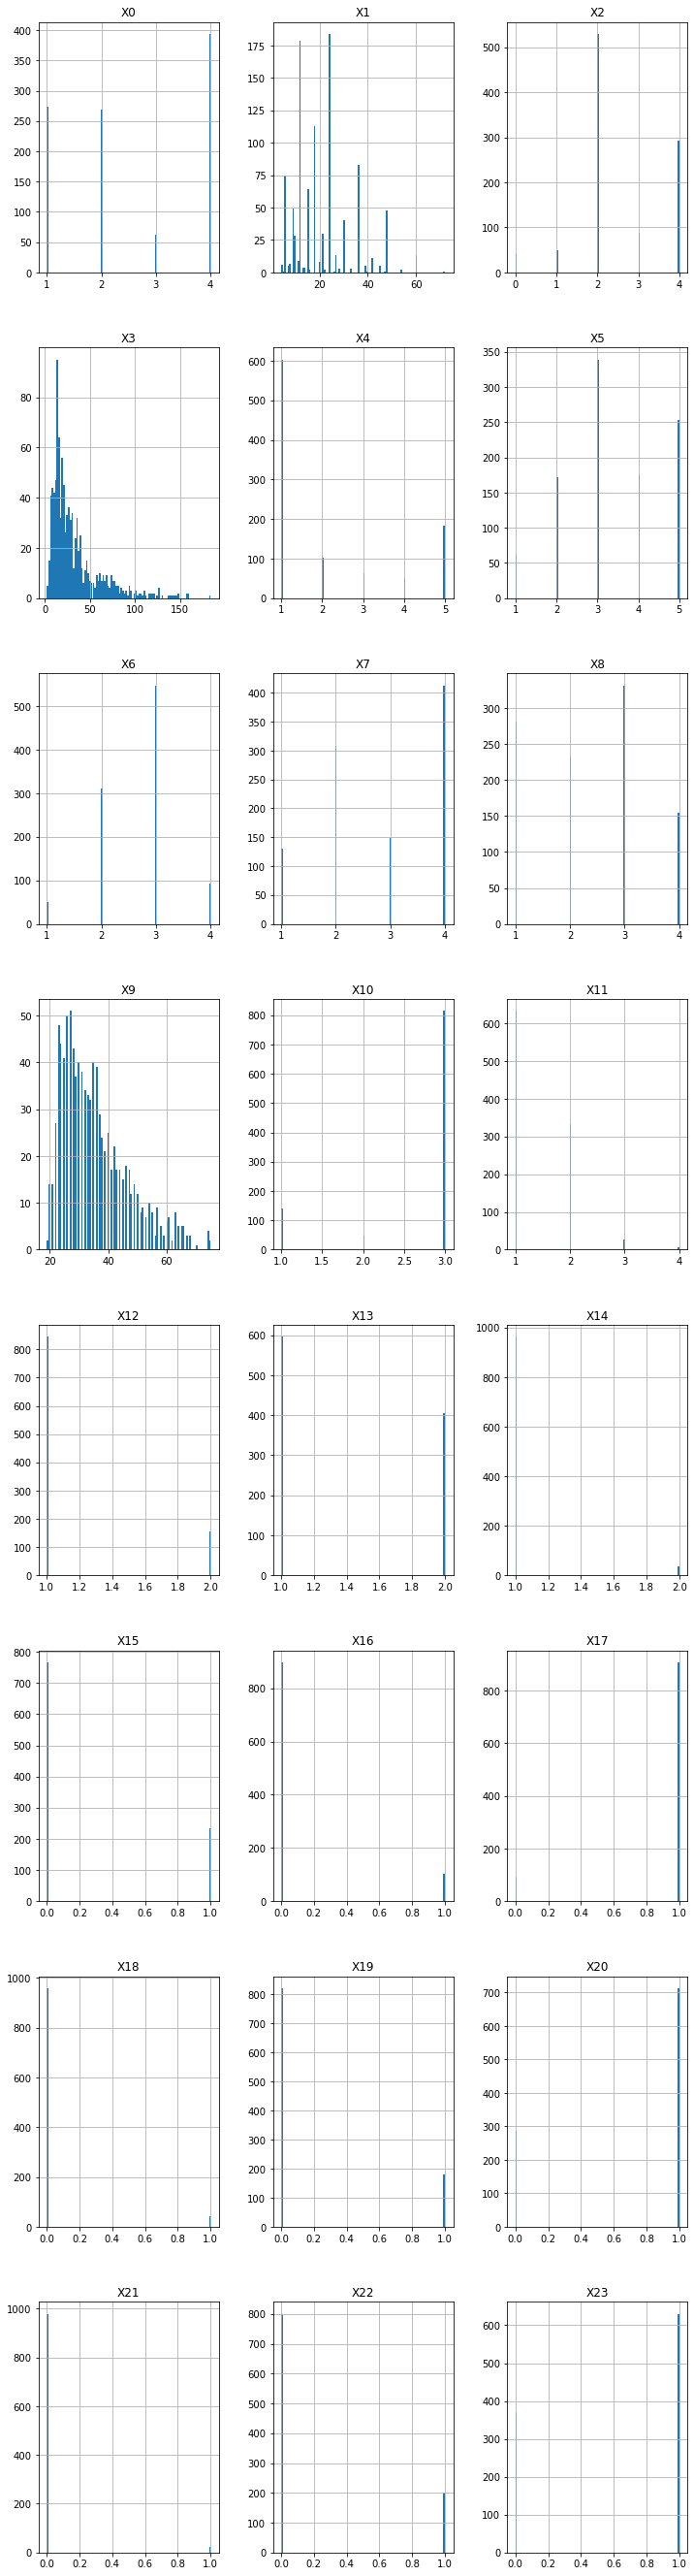

In [46]:
fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.columns[i], bins = 100, ax=axis)
        i = i+1

X3 and X9 are numeric.

In [47]:
df_to_cluster = df[['X3', 'X9']]
df_to_cluster

,X3,X9
0,12,67
1,60,22
2,21,49
3,79,45
4,49,53
...,...,...
995,17,31
996,39,40
997,8,38
998,18,23


### 3. Perform data standardization by instantiating a StandardScaler object.

In [48]:
sc = StandardScaler()
X = sc.fit_transform(df_to_cluster)
X

array([[-0.73343195,  2.76645648],
       [ 0.96637654, -1.19140394],
       [-0.41471786,  1.18331231],
       ...,
       [-0.87508266,  0.21583532],
       [-0.52095589, -1.10345149],
       [ 0.47059906, -0.75164167]])

### 4. Analyze and define the optimal number of clusters.

In [49]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 15)
inertia = []

for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(X)
    inertia.append(kmeans.inertia_)

clusters['inertia'] = inertia
alt.Chart(clusters).mark_line().encode(
    x='cluster_range', 
    y='inertia'
)

alt.Chart(...)

### 5. Fit k-means with the default hyperparameters.
### 6. Plot the clusters and their centroids.

In [52]:
model1 = KMeans(random_state=1, n_clusters=5)
model1.fit(X)
df['cluster1'] = model1.predict(X)

scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(
    x='X3', 
    y='X9',
    color='cluster1:N',
    tooltip=['cluster1', 'X3', 'X9']
).interactive()   

alt.Chart(...)

In [53]:
model2 = KMeans(random_state=1, n_clusters=5, init='k-means++', n_init=50, max_iter=1000)
model2.fit(X)
df['cluster2'] = model2.predict(X)

scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(
    x='X3', 
    y='X9',
    color='cluster2:N',
    tooltip=['cluster2', 'X3', 'X9']
).interactive()   

alt.Chart(...)

In [54]:
model3 = KMeans(random_state=1, n_clusters=4, init='k-means++', n_init=50, max_iter=1000)
model3.fit(X)
df['cluster3'] = model3.predict(X)

scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(
    x='X3', 
    y='X9',
    color='cluster3:N',
    tooltip=['cluster3', 'X3', 'X9']
).interactive()   

alt.Chart(...)

In [55]:
model4 = KMeans(random_state=1, n_clusters=3, init='k-means++', n_init=50, max_iter=1000)
model4.fit(X)
df['cluster4'] = model4.predict(X)

scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(
    x='X3', 
    y='X9',
    color='cluster4:N',
    tooltip=['cluster4', 'X3', 'X9']
).interactive()  

alt.Chart(...)